In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [ ]:
# atsisiųskite visus 
#  duomenis iš 
# https://data.gov.lt/datasets/509/
# 
# Užduotys:
# nuskaitykite visus failus į pandas DF (vienas DF vienam failui)
# Suraskite ir pateikite kitimą kas metus šių kriterijų:
# Dalyvių kiekis kiekvienais metais
# Apgadintų TP kiekis kas metus
# Žuvusių kiekis kiekvienais metais
#  Sužeistų kiekis kiekvienais metais
# Neblaivių bei apsvaigusių kaltininkų kiekio kaita kas metus
# Suraskite 3 populiariausias eismo įvykių schemas! 2023 metais (stulpelis schema2)
# ir pavaizduokite kitimą kas metus.
#  parodykite, kaip kito vyrų, moterų sukeltų EI kiekiai kas metus.
# parodykite, kaip kito neblaivių vyrų, moterų sukeltų EI kiekiai kas metus


# Kad būtų ką veikti - jei viską nuskaitysite taip paprastai į DF - python naudos ~ 3GB RAM.
# Pagalvokite, ką galima ir kur optimizuoti.

In [2]:
import glob

In [5]:
json_files = glob.glob('../../../eismas/*.json')
# for file in json_files:
#     print(file)
print(json_files)

df1 = pd.read_json(json_files[0])
df1.head()

['../../../eismas\\ei_2013_12_31.json', '../../../eismas\\ei_2014_12_31.json', '../../../eismas\\ei_2015_12_31.json', '../../../eismas\\ei_2016_12_31.json', '../../../eismas\\ei_2017_12_31.json', '../../../eismas\\ei_2018_12_31.json', '../../../eismas\\ei_2019_12_31.json', '../../../eismas\\ei_2020_12_31.json', '../../../eismas\\ei_2021_12_31.json', '../../../eismas\\ei_2022_12_31.json', '../../../eismas\\ei_2023_12_31.json']


,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-13-7271255,2012-12-31 23:32,2013-01-01 00:02,2013-03-14 10:04,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2.0,0,...,None,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897970, 'kategorija': 'Automo...","[{'tpId': 19801434, 'regValstybe': 'Lietuva', ..."
1,07-13-7271259,2013-01-01 00:54,2013-01-01 01:26,2013-03-14 10:01,0,Susidūrimas,Kiti susidūrimai,Kiti susidūrimai,2.0,0,...,None,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897891, 'kategorija': 'Automo...","[{'tpId': 19801407, 'regValstybe': None, 'kate..."
2,07-13-7271001,2012-12-31 23:46,2013-01-01 02:26,2013-01-01 02:11,0,Užvažiavimas ant gyvūno,Kiti susidūrimai,Kiti susidūrimai,1.0,0,...,None,1,100.0,None,None,None,NaN,NaN,"[{'dalyvisId': 21794565, 'kategorija': 'Automo...","[{'tpId': 19226309, 'regValstybe': 'Lietuva', ..."
3,07-13-7271276,2013-01-01 02:01,2013-01-01 03:27,2013-03-14 10:01,0,Užvažiavimas ant gyvūno,Kiti susidūrimai,Kiti susidūrimai,2.0,0,...,None,1,50.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897876, 'kategorija': 'Automo...","[{'tpId': 19801349, 'regValstybe': 'Lietuva', ..."
4,07-13-7271354,2013-01-01 02:28,2013-01-01 03:49,2013-07-30 15:23,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Kiti eismo įvykiai,2.0,0,...,None,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 24796989, 'kategorija': 'Automo...","[{'tpId': 21000436, 'regValstybe': 'Lietuva', ..."


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21946 entries, 0 to 21945
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   registrokodas                 21946 non-null  object 
 1   dataLaikas                    21946 non-null  object 
 2   registravimoData              21946 non-null  object 
 3   paskutinioRedagavimoLaikas    21297 non-null  object 
 4   iskaitinis                    21946 non-null  int64  
 5   rusis                         21297 non-null  object 
 6   schema1                       21297 non-null  object 
 7   schema2                       21297 non-null  object 
 8   dalyviuSkaicius               21297 non-null  float64
 9   zuvusiuSkaicius               21946 non-null  int64  
 10  zuvVaiku                      3 non-null      float64
 11  suzeistuSkaicius              21946 non-null  int64  
 12  suzeistaVaiku                 3 non-null      float64
 13  t

In [18]:
# dalyviuSkaicius,
# zuvusiuSkaicius, 
# schema2,
# suzeistuSkaicius,
# neblaivusKaltininkai,
# apsvaigeKaltininkai,
# eismoDalyviai,
# eismoTranspPreimone 
len(json_files)

df13 = pd.read_json(json_files[0])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df14 = pd.read_json(json_files[1])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df15 = pd.read_json(json_files[2])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df16 = pd.read_json(json_files[3])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df17 = pd.read_json(json_files[4])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df18 = pd.read_json(json_files[5])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df19 = pd.read_json(json_files[6])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df20 = pd.read_json(json_files[7])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df21 = pd.read_json(json_files[8])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df22 = pd.read_json(json_files[9])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'apgadintuTpSkaicius']]
df23 = pd.read_json(json_files[10])[['dalyviuSkaicius', 'zuvusiuSkaicius', 'schema2', 'suzeistuSkaicius', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone']]


In [9]:
df13.head()

,dalyviuSkaicius,zuvusiuSkaicius,schema2,suzeistuSkaicius,neblaivusKaltininkai,apsvaigeKaltininkai,eismoDalyviai,eismoTranspPreimone
0,2.0,0,Susidūrimas su stovinčia TP,0,None,None,"[{'dalyvisId': 22897970, 'kategorija': 'Automo...","[{'tpId': 19801434, 'regValstybe': 'Lietuva', ..."
1,2.0,0,Kiti susidūrimai,0,None,None,"[{'dalyvisId': 22897891, 'kategorija': 'Automo...","[{'tpId': 19801407, 'regValstybe': None, 'kate..."
2,1.0,0,Kiti susidūrimai,0,None,None,"[{'dalyvisId': 21794565, 'kategorija': 'Automo...","[{'tpId': 19226309, 'regValstybe': 'Lietuva', ..."
3,2.0,0,Kiti susidūrimai,0,None,None,"[{'dalyvisId': 22897876, 'kategorija': 'Automo...","[{'tpId': 19801349, 'regValstybe': 'Lietuva', ..."
4,2.0,0,Kiti eismo įvykiai,0,None,None,"[{'dalyvisId': 24796989, 'kategorija': 'Automo...","[{'tpId': 21000436, 'regValstybe': 'Lietuva', ..."


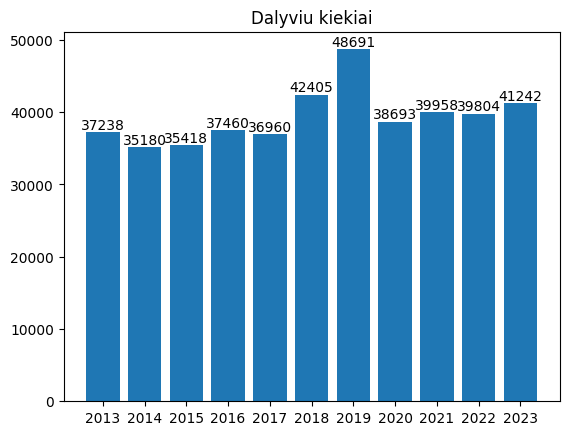

In [13]:
metai = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
dalyviuKiekiai = []
dalyviuKiekiai.append(df13['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df14['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df15['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df16['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df17['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df18['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df19['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df20['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df21['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df22['dalyviuSkaicius'].sum())
dalyviuKiekiai.append(df23['dalyviuSkaicius'].sum())

fig, ax = plt.subplots()

B = ax.bar(metai, dalyviuKiekiai)
ax.bar_label(B)
ax.set_xticks(metai)
plt.title('Dalyviu kiekiai')
plt.show()

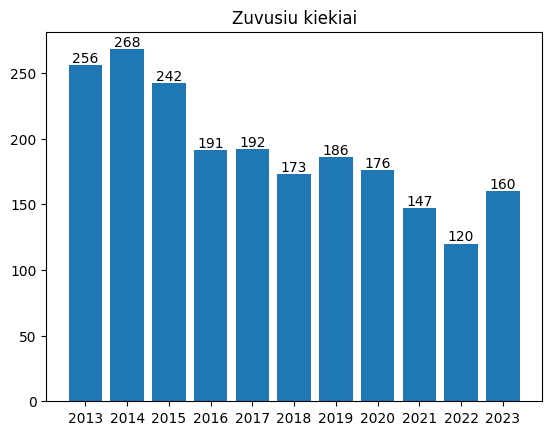

In [14]:
zuvusiuSkaicius = []
zuvusiuSkaicius.append(df13['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df14['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df15['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df16['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df17['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df18['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df19['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df20['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df21['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df22['zuvusiuSkaicius'].sum())
zuvusiuSkaicius.append(df23['zuvusiuSkaicius'].sum())

fig, ax = plt.subplots()

B = ax.bar(metai, zuvusiuSkaicius)
ax.bar_label(B)
ax.set_xticks(metai)
plt.title('Zuvusiu kiekiai')
plt.show()

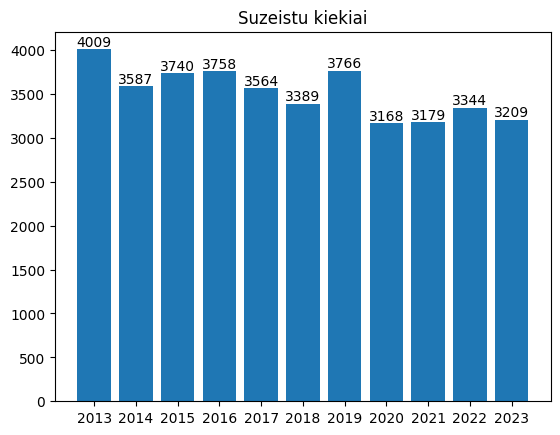

In [15]:
suzeistuSkaicius = []
suzeistuSkaicius.append(df13['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df15['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df16['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df14['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df17['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df18['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df19['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df20['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df21['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df22['suzeistuSkaicius'].sum())
suzeistuSkaicius.append(df23['suzeistuSkaicius'].sum())

fig, ax = plt.subplots()

B = ax.bar(metai, suzeistuSkaicius)
ax.bar_label(B)
ax.set_xticks(metai)
plt.title('Suzeistu kiekiai')
plt.show()

[1.0, 564.0, 1690.0, 1590.0, 1366.0, 1297.0, 1344.0, 1369.0, 1250.0, 1248.0, 1069.0]


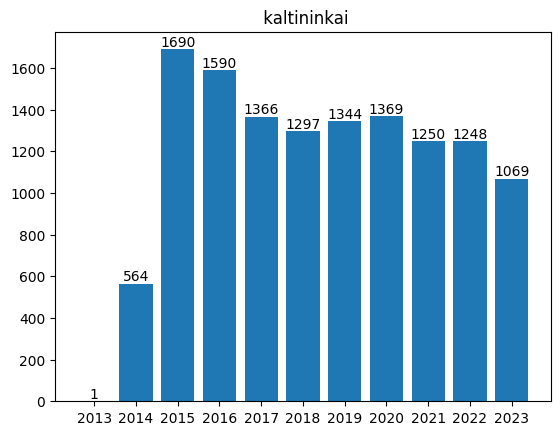

In [51]:
neblaivus = []
neblaivus.append(float(df13[df13['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df14[df14['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df15[df15['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df16[df16['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df17[df17['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df18[df18['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df19[df19['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df20[df20['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df21[df21['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df22[df22['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))
neblaivus.append(float(df23[df23['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()))


print(neblaivus)

fig, ax = plt.subplots()

a = np.arange(1,12)
w = 0.2

B1 = ax.bar(metai, neblaivus)
# B1 = ax.bar(a-w/2, neblaivus, label='neblaivus', width=w)
ax.bar_label(B1)

# B2 = ax.bar(a+w/2, apsvaige, label='apsvaige', width=w)
# ax.bar_label(B2)

ax.set_xticks(metai)
plt.title('neblaivus kaltininkai')
plt.show()



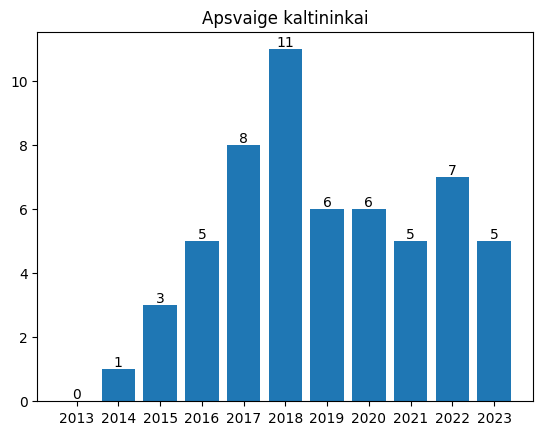

In [52]:
apsvaige = []
apsvaige.append(float(df13[df13['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df14[df14['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df15[df15['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df16[df16['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df17[df17['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df18[df18['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df19[df19['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df20[df20['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df21[df21['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df22[df22['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))
apsvaige.append(float(df23[df23['apsvaigeKaltininkai'] == 'Taip']['apsvaigeKaltininkai'].value_counts().sum()))


fig, ax = plt.subplots()

a = np.arange(1,12)
w = 0.2

B1 = ax.bar(metai, apsvaige)
# B1 = ax.bar(a-w/2, neblaivus, label='neblaivus', width=w)
ax.bar_label(B1)

# B2 = ax.bar(a+w/2, apsvaige, label='apsvaige', width=w)
# ax.bar_label(B2)

ax.set_xticks(metai)
plt.title('Apsvaige kaltininkai')
plt.show()


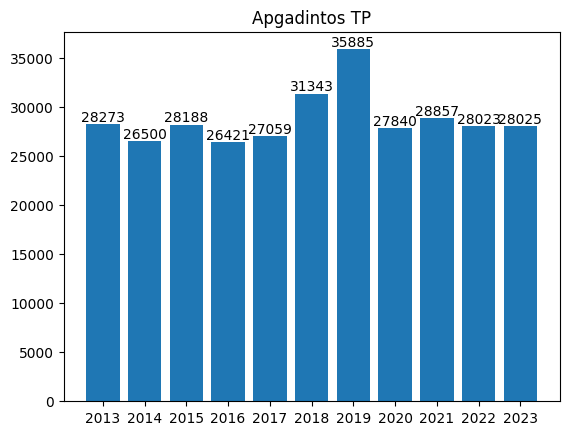

In [19]:
apgadintos = []
apgadintos.append(df13['apgadintuTpSkaicius'].sum())
apgadintos.append(df15['apgadintuTpSkaicius'].sum())
apgadintos.append(df16['apgadintuTpSkaicius'].sum())
apgadintos.append(df14['apgadintuTpSkaicius'].sum())
apgadintos.append(df17['apgadintuTpSkaicius'].sum())
apgadintos.append(df18['apgadintuTpSkaicius'].sum())
apgadintos.append(df19['apgadintuTpSkaicius'].sum())
apgadintos.append(df20['apgadintuTpSkaicius'].sum())
apgadintos.append(df21['apgadintuTpSkaicius'].sum())
apgadintos.append(df22['apgadintuTpSkaicius'].sum())
apgadintos.append(df23['apgadintuTpSkaicius'].sum())

fig, ax = plt.subplots()

B = ax.bar(metai, apgadintos)
ax.bar_label(B)
ax.set_xticks(metai)
plt.title('Apgadintos TP')
plt.show()

In [46]:
df13[df13['neblaivusKaltininkai'] == 'Taip']['neblaivusKaltininkai'].value_counts().sum()

.reset_index().sort_values(by='', ascending='False')

np.int64(1)

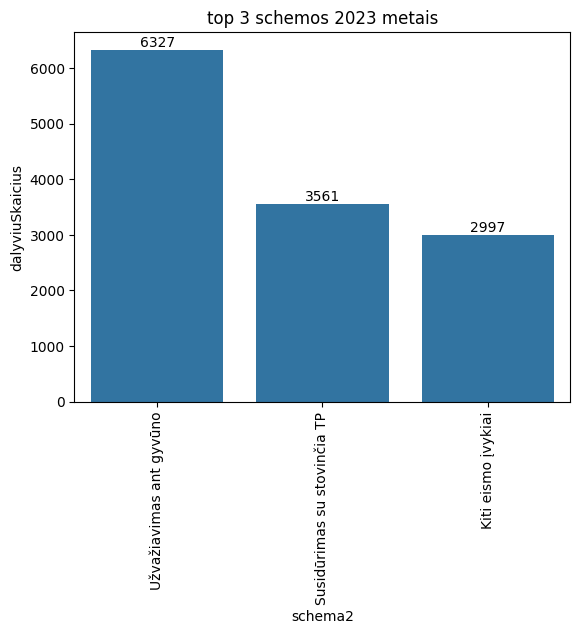

In [59]:
iv23df = df23[['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='dalyviuSkaicius', ascending=False)[:3]
iv23df

fig, ax = plt.subplots()
ax = sns.barplot(data=iv23df, x=iv23df['schema2'], y=iv23df['dalyviuSkaicius'])


for i in ax.containers:
    ax.bar_label(i)
    
ax.tick_params(axis='x', rotation=90)
plt.title('top 3 schemos 2023 metais')

plt.show()

In [63]:
top3 = iv23df.value_counts().index
top3

MultiIndex([(         'Kiti eismo įvykiai', 2997),
            ('Susidūrimas su stovinčia TP', 3561),
            (    'Užvažiavimas ant gyvūno', 6327)],
           names=['schema2', 'dalyviuSkaicius'])

Text(0.5, 1.0, 'top 3 schemos 2013 metais')

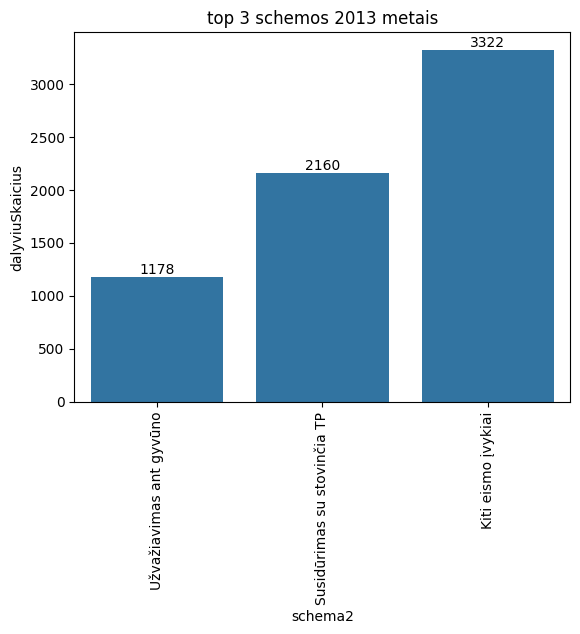

In [67]:
iv13df = df13[(df13['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df13['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df13['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]
iv13df

fig, ax = plt.subplots()
ax = sns.barplot(data=iv13df, x=iv13df['schema2'], y=iv13df['dalyviuSkaicius'])


for i in ax.containers:
    ax.bar_label(i)
    
ax.tick_params(axis='x', rotation=90)
plt.title('top 3 schemos 2013 metais')


Text(0.5, 1.0, 'top 3 schemos 2014 metais')

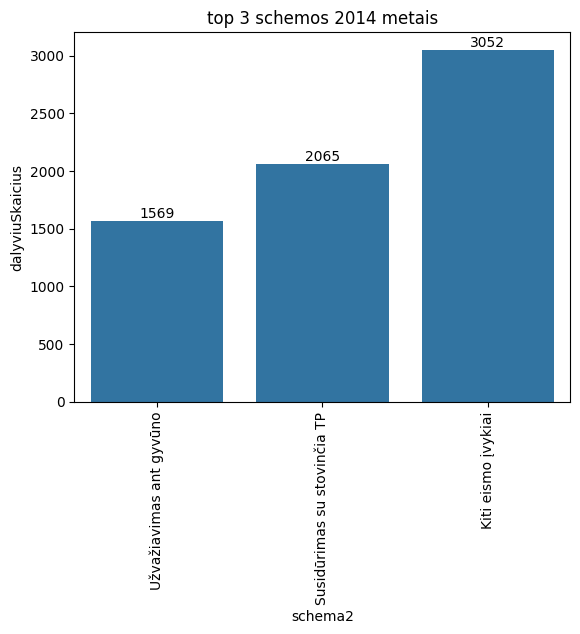

In [68]:
iv14df = df14[(df14['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df14['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df14['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]
iv14df

fig, ax = plt.subplots()
ax = sns.barplot(data=iv14df, x=iv14df['schema2'], y=iv14df['dalyviuSkaicius'])


for i in ax.containers:
    ax.bar_label(i)
    
ax.tick_params(axis='x', rotation=90)
plt.title('top 3 schemos 2014 metais')

In [76]:
iv15df = df15[(df15['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df15['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df15['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv16df = df16[(df16['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df16['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df16['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv17df = df17[(df17['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df17['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df17['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv18df = df18[(df18['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df18['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df18['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]


iv20df = df20[(df20['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df20['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df20['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv20df = df20[(df20['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df20['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df20['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv21df = df21[(df21['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df21['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df21['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

iv22df = df22[(df22['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df22['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df22['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]


In [77]:
iv19df = df19[(df19['schema2'] == 'Užvažiavimas ant gyvūno') |
              (df19['schema2'] == 'Susidūrimas su stovinčia TP') |
              (df19['schema2'] == 'Kiti eismo įvykiai')][['schema2', 'dalyviuSkaicius']].groupby('schema2').count().reset_index().sort_values(by='schema2', ascending=False)[:3]

In [78]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
#  Klausimai:
#  Ar buvo mėnesių, kurie išssikirtų gaisringumu?
#  Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

#  kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.
#  ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
#  
#  pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
#  Pateikite procentinį įvertinimą.

#  Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?


In [80]:
ivdf = pd.concat([iv13df, iv14df, iv15df, iv16df, iv17df, iv18df, iv19df, iv20df, iv21df, iv22df, iv23df])
ivdf

,schema2,dalyviuSkaicius
2,Užvažiavimas ant gyvūno,1178
1,Susidūrimas su stovinčia TP,2160
0,Kiti eismo įvykiai,3322
2,Užvažiavimas ant gyvūno,1569
1,Susidūrimas su stovinčia TP,2065
0,Kiti eismo įvykiai,3052
2,Užvažiavimas ant gyvūno,1933
1,Susidūrimas su stovinčia TP,2210
0,Kiti eismo įvykiai,3110
2,Užvažiavimas ant gyvūno,2311
